### Importando base de dados

In [42]:
import pandas as pd

In [43]:
dados = pd.read_csv("tips.csv")

In [44]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [45]:
dados.shape

(244, 6)

In [46]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [47]:
dados.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


### Tradução

In [48]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [49]:
dados = dados.set_axis(['Total da conta', 'Gorjeta', 'Sobremesa', 'Dia da semana', 'Horario', 'Quantidade de pessoas'], axis=1)
dados

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [50]:
dados['Sobremesa'].replace(['No', 'Yes'], ['Não', 'Sim'], inplace=True)
dados['Dia da semana'].replace(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab'], inplace=True)
dados['Horario'].replace(['Dinner', 'Lunch'], ['Jantar', 'Almoço'], inplace=True)
dados

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas
0,16.99,1.01,Não,Dom,Jantar,2
1,10.34,1.66,Não,Dom,Jantar,3
2,21.01,3.50,Não,Dom,Jantar,3
3,23.68,3.31,Não,Dom,Jantar,2
4,24.59,3.61,Não,Dom,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sab,Jantar,3
240,27.18,2.00,Sim,Sab,Jantar,2
241,22.67,2.00,Sim,Sab,Jantar,2
242,17.82,1.75,Não,Sab,Jantar,2


### Importando o Seaborn

In [51]:
import seaborn as sns

### Análise 1 - Valor da conta e gorjeta

In [53]:
dados.columns

Index(['Total da conta', 'Gorjeta', 'Sobremesa', 'Dia da semana', 'Horario',
       'Quantidade de pessoas'],
      dtype='object')

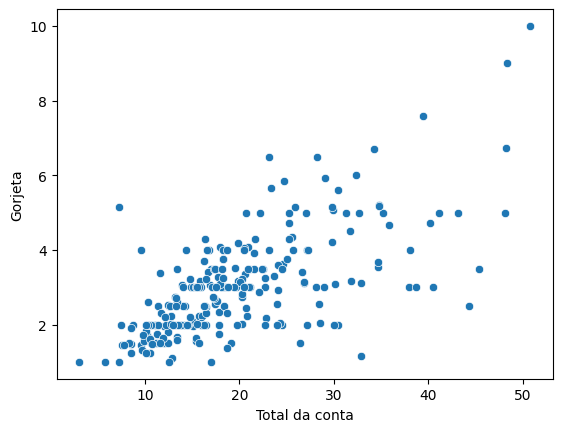

In [56]:
ax = sns.scatterplot(x='Total da conta', y='Gorjeta', data=dados)

**Visualmente o valor da gojeta aumenta conforme o valor da conta aumenta**

In [63]:
print(f'A base de dados contem {dados.shape[0]} registros')
print(f'Quantidade de registros não nulos:\n{dados.count()}')

A base de dados contem 244 registros
Quantidade de registros não nulos:
Total da conta           244
Gorjeta                  244
Sobremesa                244
Dia da semana            244
Horario                  244
Quantidade de pessoas    244
dtype: int64


#### Criando o campo porcentagem

In [64]:
dados.head(1)

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas
0,16.99,1.01,Não,Dom,Jantar,2


In [70]:
dados['Porcentagem'] = dados['Gorjeta'] / dados['Total da conta']

In [71]:
dados.head(1)

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059447


In [72]:
dados.Porcentagem = dados.Porcentagem.round(2)

In [74]:
dados.head()

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17
3,23.68,3.31,Não,Dom,Jantar,2,0.14
4,24.59,3.61,Não,Dom,Jantar,4,0.15


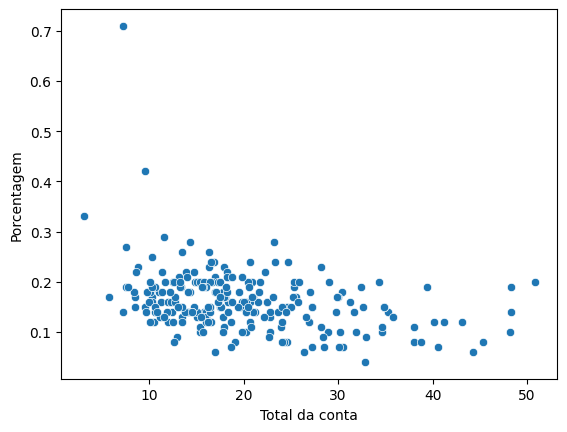

In [75]:
ax = sns.scatterplot(x='Total da conta', y='Porcentagem', data=dados)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**